In [1]:
import numpy as np

from scipy.integrate import odeint

import matplotlib.pyplot as plt
import seaborn as sns

def set_plot_style():
    sns.set_style("white")
    font = {'family': 'sans-serif', 'serif': 'Helvetica',
            'size': 25}
    plt.rc('font', **font)
    legnd = {'fontsize': 18, 'handlelength': 1.5}
    plt.rc('legend', **legnd)
    mathtext = {'mathtext.default': 'regular' } 
    plt.rcParams.update(mathtext)

In [2]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*1000)

In [3]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [4]:
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

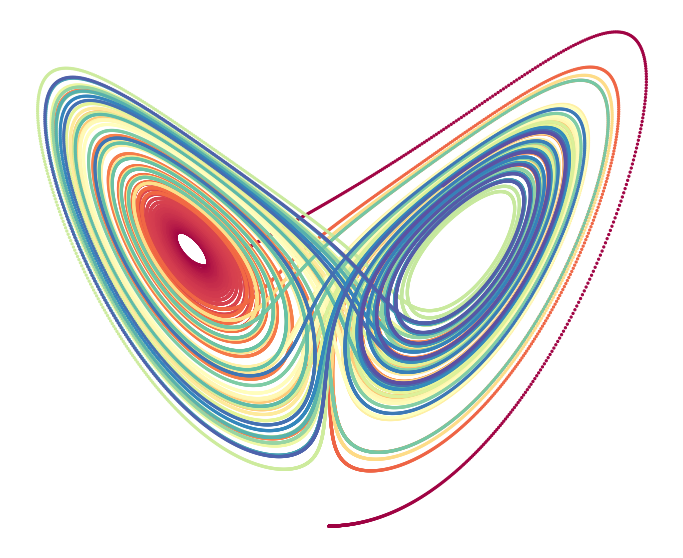

In [7]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(x, z, c=time_points, cmap="Spectral", s=5)

plt.axis("off")
fig.savefig("lorenz_attractors.png", transparent=True, bbox_inches="tight")

## References

I've learned to demonstrate the beauty of the Lorenz system from the following work:

- <https://geoffboeing.com/2016/12/animating-lorenz-attractor-python/>
- <https://fromsystosys.netlify.app/2018/07/28/lorenz-attractor-animation-plotly/>